In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
    print("Agrego el src")

/home/alejandro/.dev/tda_2023Q1/tp2/src
Agrego el src


In [2]:
from data import generate_random_data
from bruteforce import bruteforce
from utils import perform_time_test

import matplotlib.pyplot as plt
import pandas as pd
from collections.abc import Iterable
from multiprocessing import Pool

In [3]:
generate_random_data()

[0.5, 0.91, 0.03, 0.46, 0.52, 0.56, 0.54, 0.7, 0.06, 0.31]

In [4]:
def wrap_time_test(n, func, data):
    result, exe_time = perform_time_test(func, data)
    return n, result, exe_time

def test_bruteforce(nsets: Iterable[Iterable[float]], pool_size=1):
    ns = []
    time_results = []
    
    
    async_responses = []
    
    with Pool(pool_size) as p:
        for nset in nsets:
            for data in nset:
                nlen = len(data)
                #print(f'Llamo con {nlen} y {data}')
                async_res = p.apply_async(wrap_time_test, args=(nlen, bruteforce, data))
                #print(f'Obtuve como resultado de {nlen} en {exe_time}')
                async_responses.append(async_res)
                #time_results.append(exe_time)
                #ns.append(nlen)

        for async_res in async_responses:
            async_res.wait()
            n, result, exe_time = async_res.get()
            ns.append(n)
            time_results.append(exe_time)

    df = pd.DataFrame({'n': ns, 'times': time_results})
    return df

In [5]:
%%time
df_test = test_bruteforce(((generate_random_data(length=n) for i in range(3)) for n in [9, 10, 11, 12]), pool_size=6)
df_test

CPU times: user 88.5 ms, sys: 38.7 ms, total: 127 ms
Wall time: 30min 30s


,n,times
0,9,1.216916
1,9,1.137836
2,9,0.898380
3,10,7.831767
4,10,15.780019
5,10,16.030042
6,11,210.776504
7,11,215.460243
8,11,180.665471
9,12,1776.591041


In [6]:
avg_df = df_test.groupby('n')['times'].mean().to_frame('avg')
avg_df

,avg
n,
9,1.084377
10,13.213943
11,202.300740
12,1779.285507


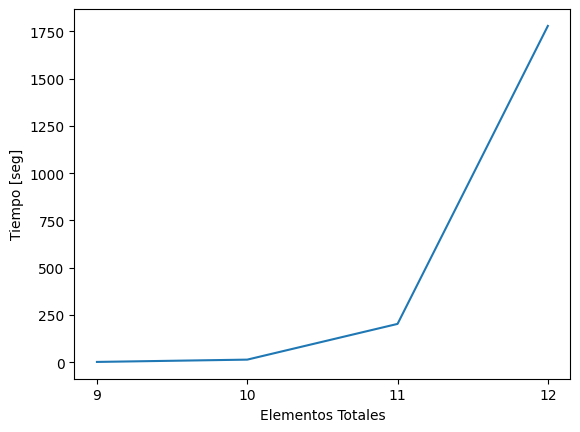

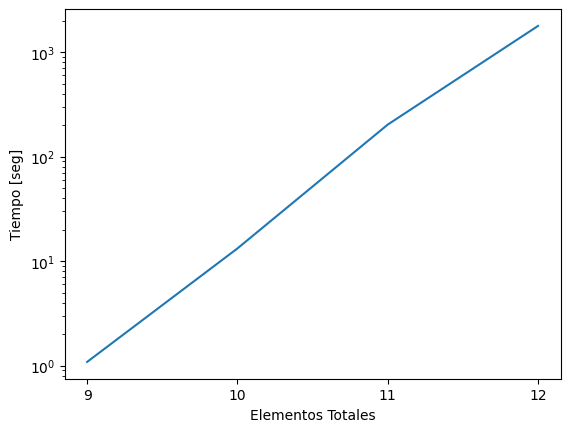

In [21]:
plt.plot(avg_df)
plt.xticks([9, 10, 11, 12])
plt.xlabel("Elementos Totales")
plt.ylabel("Tiempo [seg]")
plt.show()

plt.plot(avg_df)
plt.xticks([9, 10, 11, 12])
plt.yscale("log")
plt.xlabel("Elementos Totales")
plt.ylabel("Tiempo [seg]")
plt.show()

In [14]:
print(df_test.to_latex(index=False, column_format='|c|c|'))

\begin{tabular}{|c|c|}
\toprule
n & times \\
\midrule
9 & 1.216916 \\
9 & 1.137836 \\
9 & 0.898380 \\
10 & 7.831767 \\
10 & 15.780019 \\
10 & 16.030042 \\
11 & 210.776504 \\
11 & 215.460243 \\
11 & 180.665471 \\
12 & 1776.591041 \\
12 & 1750.481009 \\
12 & 1810.784472 \\
\bottomrule
\end{tabular}



In [16]:
print(avg_df.to_latex(index=True, column_format='|c|c|'))

\begin{tabular}{|c|c|}
\toprule
 & avg \\
n &  \\
\midrule
9 & 1.084377 \\
10 & 13.213943 \\
11 & 202.300740 \\
12 & 1779.285507 \\
\bottomrule
\end{tabular}

